# Imports

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# default params
plt.rcParams['figure.figsize'] = (12,6)

# Loading the Image

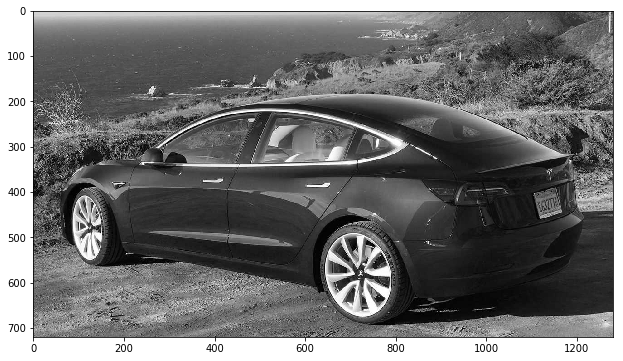

In [2]:
# Tesla Model 3 Image
# https://cdn.motor1.com/images/mgl/B8Ev6/s3/tesla-model-3-the-pros-and-cons-of-extreme-innovation.jpg

img_path = 'https://cdn.motor1.com/images/mgl/B8Ev6/s3/tesla-model-3-the-pros-and-cons-of-extreme-innovation.jpg'

req = urllib.request.urlopen(img_path)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
rgb_img = cv2.imdecode(arr, -1) # 'Load it as it is'

#from google.colab.patches import cv2_imshow
#cv2_imshow(rgb_img)

# convert to grayscale
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

# normalize and rescale
gray_img = gray_img.astype("float32")/255

# show image
plt.imshow(gray_img, cmap='gray')
plt.show()

# Visualizing Conv and Maxpool Layers


In [0]:
# Predefine kernel weights instead of learning them for visualization

kernel_1 = np.array([[-1, -2, -1],
                     [0,0,0],
                     [1,2,1]])

kernel_2 = np.array([[0, -1, 0],
                     [-1,4,-1],
                     [0,-1,0]])

kernel_3 = np.array([[-1, 0, 1],
                     [-2,0,2],
                     [-1,0,1]])

kernel_list = np.array([kernel_1, kernel_2, kernel_3])

In [0]:
# Define the Model
class VisualNet(nn.Module):

    def __init__(self, weight):
        super(VisualNet, self).__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, bias=False)

        # setting the weights
        self.conv.weight = nn.Parameter(weight)

        # maxpool
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)

        return conv_x, activated_x, pooled_x

In [5]:
# instantiate the model
weight = torch.from_numpy(kernel_list).unsqueeze(1).type(torch.FloatTensor)
model = VisualNet(weight)

print(model)
print(model.conv.weight.data)

VisualNet(
  (conv): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
tensor([[[[-1., -2., -1.],
          [ 0.,  0.,  0.],
          [ 1.,  2.,  1.]]],


        [[[ 0., -1.,  0.],
          [-1.,  4., -1.],
          [ 0., -1.,  0.]]],


        [[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]])


In [0]:
def viz_layer(layer, n_filters= 3):  
    fig = plt.figure(figsize=(20, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

        
# plot given filters as small images in a row
def plot_filters(filters):
    n_filters = len(filters)
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i], cmap='gray')
        ax.set_title('Filter %s' % str(i+1))


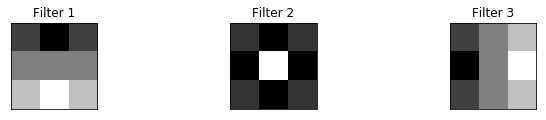

In [7]:
plot_filters(kernel_list)

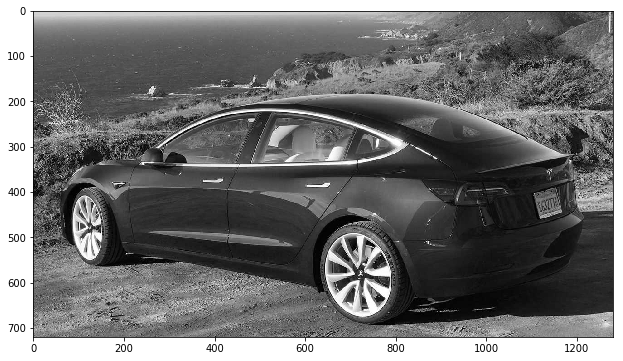

In [8]:
# run the model
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# plot original image
plt.imshow(gray_img, cmap='gray')

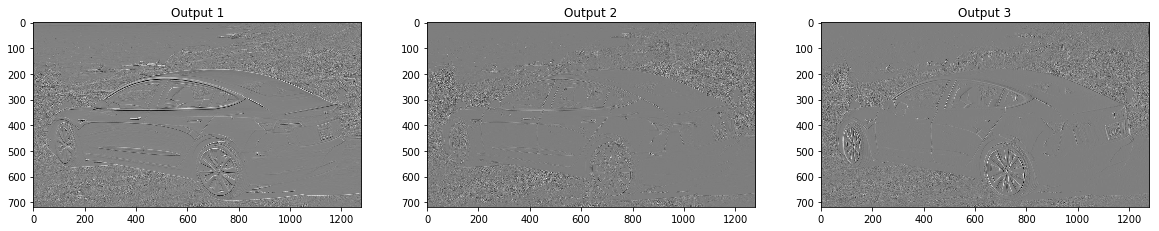

In [9]:
# Visualize the output of the convolutional layer
viz_layer(conv_layer)

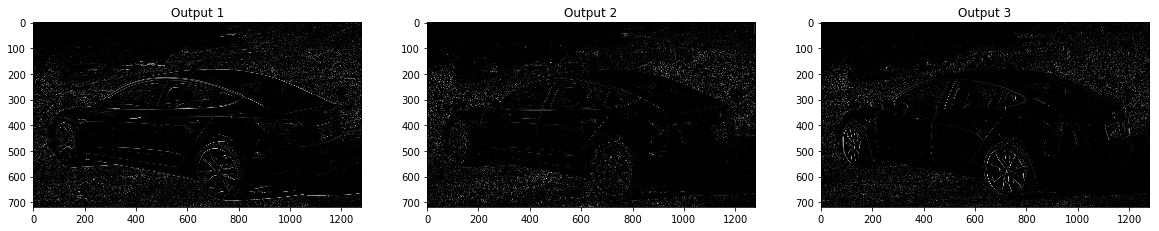

In [10]:
# Visualize the output of the activation
viz_layer(activated_layer)

Maxpool: Only maximum (brightest) values in a given kernel area is kept. Stride=2 means the image size is halfed.

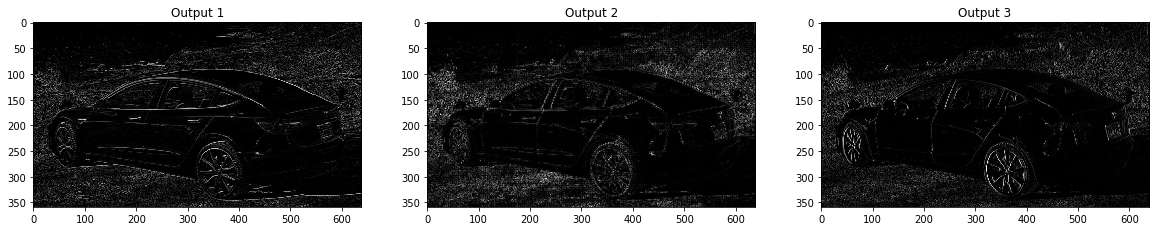

In [11]:
# Visualize the output of the maxpool layer
viz_layer(pooled_layer)